**Performance Improvement: Absenteeism at Work**

In [58]:
#Library

#Basic Statistic & Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Statistic Test
from scipy.stats import normaltest

#Preprocessing
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score,KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

#Modeling
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from numpy import mean
from numpy import absolute

# Model Interpretation
import shap

pd.options.display.max_columns=None
pd.options.display.max_rows=None
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Problem Statement

**Background**

<p style='text-align: justify;'>Organizations over the years have sought means of improving employee resource management 
particular with the interest of reducing the employee work absenteeism and to maintain low level 
of employee turnover in any industry. Employee motivation, shift work system, team 
work and other means of enhancing employee happiness and job satisfaction have been applied by 
management to reduce employee absenteeism and labour turnover to improve overall 
organizational performance. However, despite the awareness of the adverse effect of absenteeism 
on overall organizational productivity and performance, the level of absenteeism tend to remain 
high. Absenteeism defined as any failure of an employee to report for or remain at work 
as scheduled, regardless of reason, expresses a monitory implication. The term ‘as scheduled’ is very significant, for this automatically excludes vacations, holidays, jury duty and the like. It also 
eliminates the problem of determining whether the absenteeism is excusable or not. Medically 
verified illness is a good example</p>

**Problem**

<p style='text-align: justify;'>From a business perspective, the employee is absent and is 
simply not available to perform his or her job, which means the absenteeism will cost 
money. Absenteeism is costly because it reduces output and is disruptive because it 
requires that schedules and programmes be modified and one of the contributory factors in the failure of organisations a departments to meet performance targets.</p>

**Goals**

We want to predict how many working hours an employee could be away from work so we can reordering the task to improve performance and work quality and we want to know which Employee will absent</p>

# Data Understanding

## Load Dataset

In [59]:
df = pd.read_csv("Absenteeism_data.csv")
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


**Feature Descriptions**

* ID : Individual identification
* Reason of absence : Reasons 1-21 are registered in the International Classification Diseases(ICD)
    1. Certain infectious or parasitic diseases  
    2. Neoplasms
    3. Diseases of the blood or blood-forming organs and certain disorders involving the immune mechanism
    4. Endocrine, nutritional or metabolic diseases
    5. Mental, behavioural or neurodevelopmental disorders
    6. Diseases of the nervous system  
    7. Diseases of the visual system  
    8. Diseases of the ear or mastoid process  
    9. Diseases of the circulatory system  
    10. Diseases of the respiratory system  
    11. Diseases of the digestive system  
    12. Diseases of the skin  
    13. Diseases of the musculoskeletal system or connective tissue 
    14. Diseases of the genitourinary system
    15. Pregnancy, childbirth or the puerperium  
    16. Certain conditions originating in the perinatal period
    17. Congenital malformations, deformations, and chromosomal abnormalities
    18. Symptoms, signs or clinical findings, not elsewhere classified  
    19. Injury, poisoning or certain other consequences of external causes  
    20. External causes of morbidity or mortality  
    21. Factors influencing health status or contact with health services  
    22. Patient follow-up
    23. Medical consultation
    24. Blood donation
    25. Laboratory examination
    26. Unjustified absence
    27. Physiotherapy
    28. Dental Consultation
* Date : Date of Absence
* Transportation Expense : Cost related to business travel (fuel, parking, meals, etc)
* Distance to work : Distance measured in km
* Age : Years of age
* Daily workload average : Measured in minutes
* Body Mass Index : Number based on your weight and height
* Education : Representing different levels of education
    1. High School
    2. Graduate
    3. Post Graduate
    4. Master / Doctor
* Childern : Number children in the family
* Pets : Number of pets in family
* Absenteeism time in hours : Target

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


Date feature has object data type, it should be time stamp

## Drop Unique Feature

In [61]:
#Drop ID data because it contain unique data
df = df.drop(columns="ID")
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


# Exploratory Data Analysis (EDA)

In [62]:
# Simple Statistic
df.describe()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [63]:
#Determine Numerical Feature
num_list = list(df.drop(columns=["Education","Reason for Absence"]).select_dtypes(exclude=object).columns)
num_list

['Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Children',
 'Pets',
 'Absenteeism Time in Hours']

## Data Distribution

### Histogram

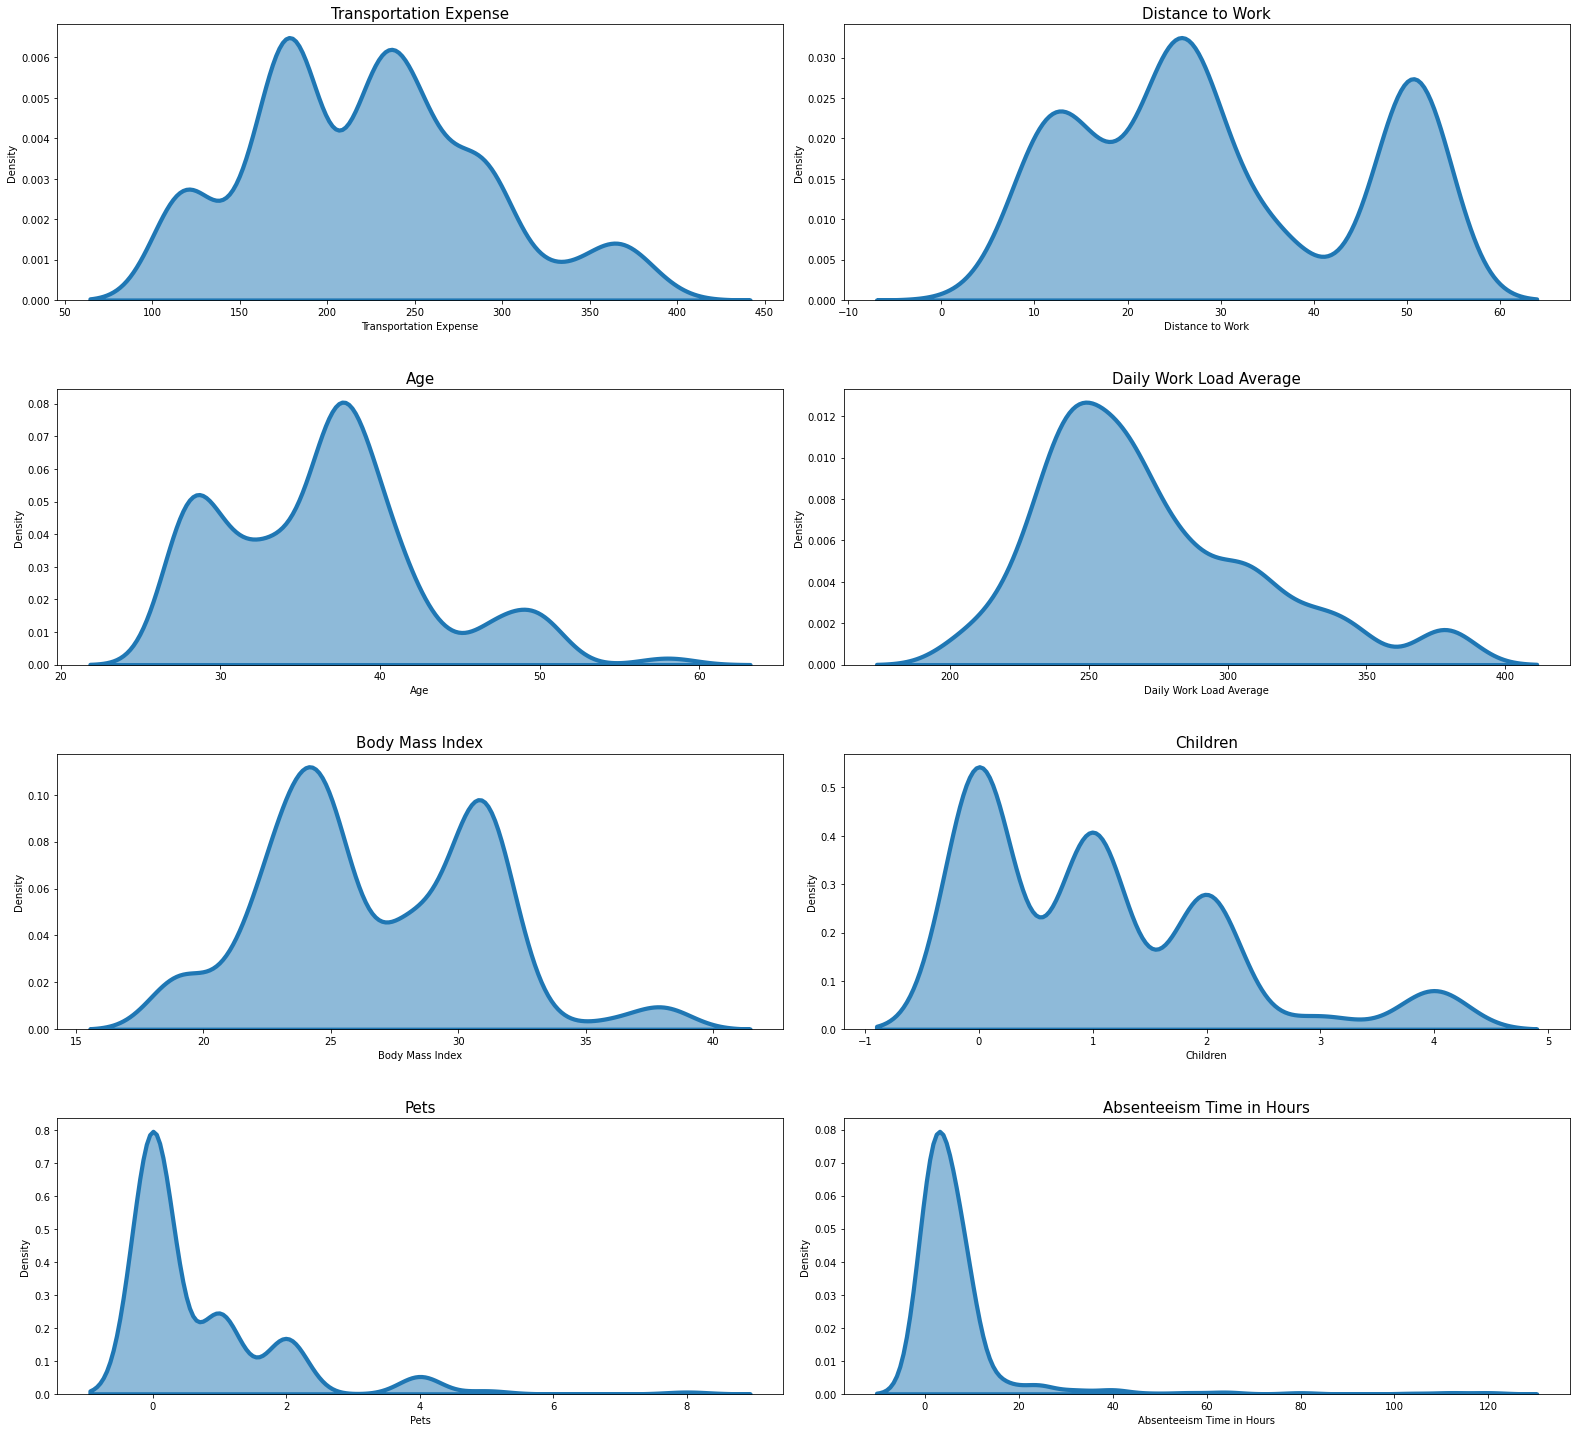

In [64]:
plt.figure(figsize=(22,20))
a = 1
for i in num_list:
    plt.subplot(4,2,a)
    plt.title(i,fontsize=15)
    sns.kdeplot(df[i],shade=True, alpha=.5, linewidth=4.2)
    a+=1
    plt.tight_layout(h_pad=4)

All numeric feature dont have normal distribution

### Boxplot

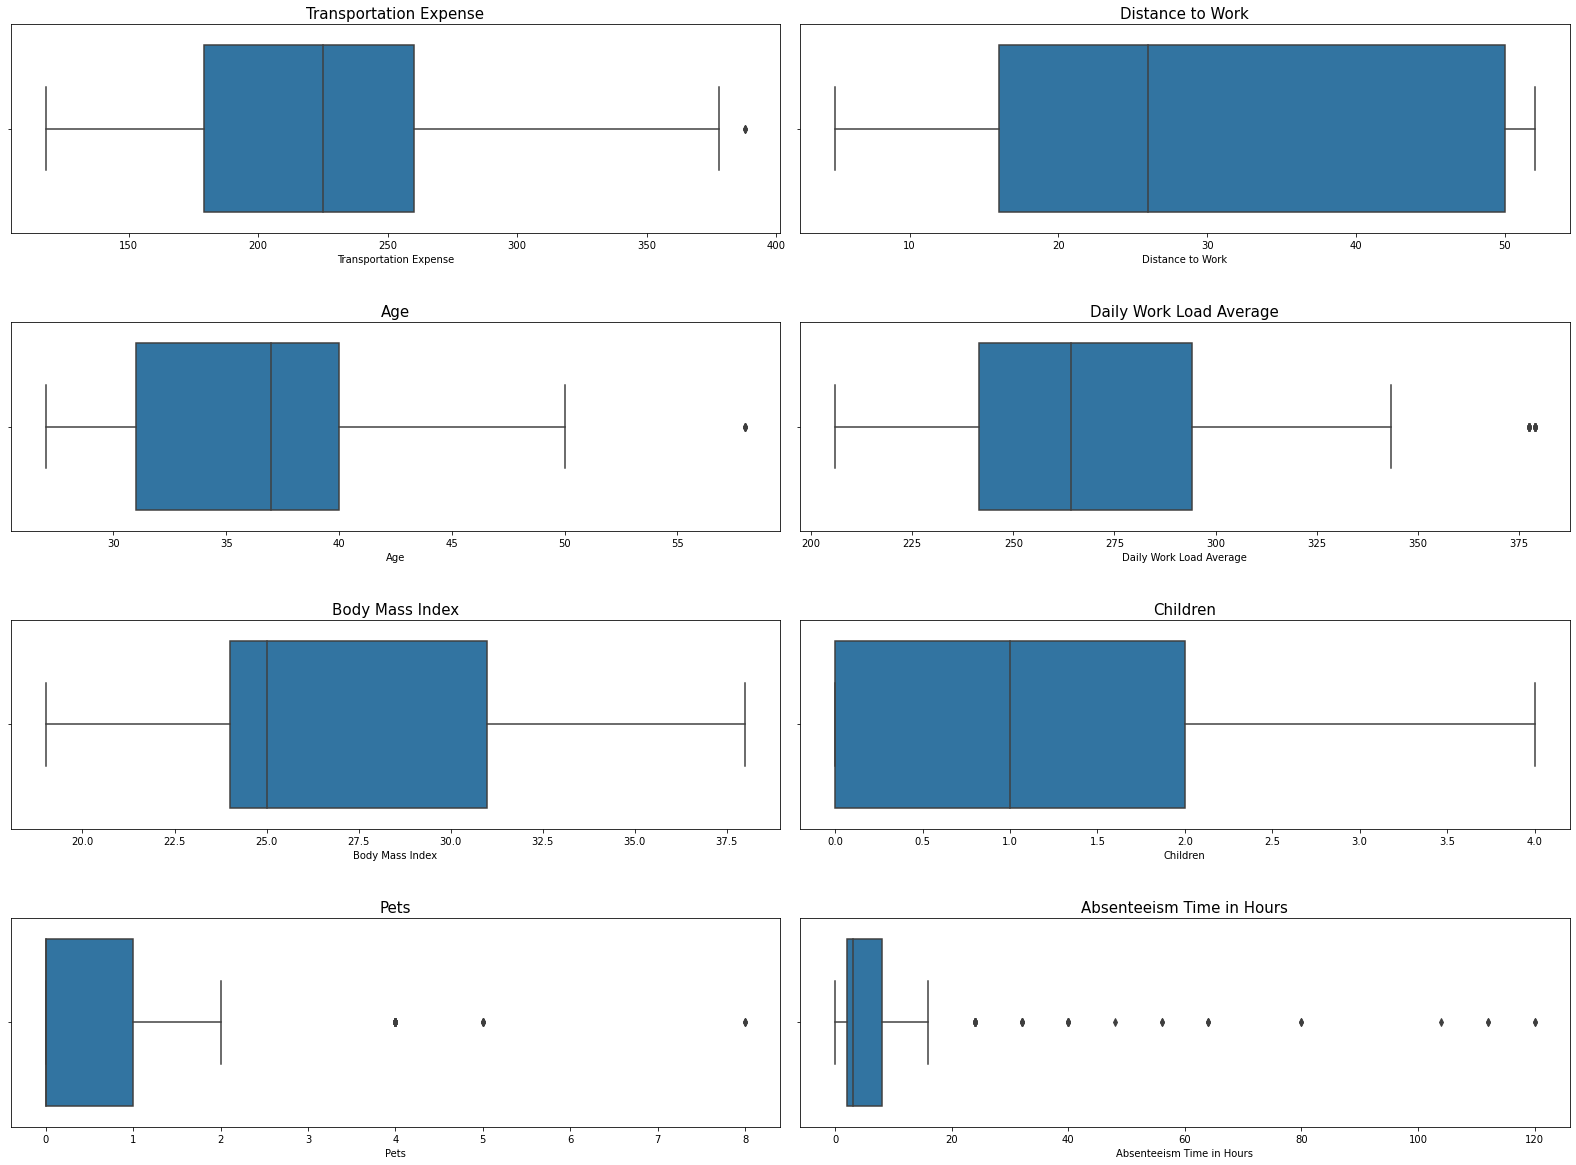

In [65]:
plt.figure(figsize=(22,20))
a = 1
for i in num_list:
    plt.subplot(5,2,a)
    plt.title(i,fontsize=15)
    sns.boxplot(df[i])
    a+=1
    plt.tight_layout(h_pad=4)

There ara some outliers on feature except Body Mass Index

## Normal Test

In [66]:
for i in num_list:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Normal distribution')
    else:
        print(i, ': Not normal distribution')

Transportation Expense : Not normal distribution
Distance to Work : Not normal distribution
Age : Not normal distribution
Daily Work Load Average : Not normal distribution
Body Mass Index : Not normal distribution
Children : Not normal distribution
Pets : Not normal distribution
Absenteeism Time in Hours : Not normal distribution


With statistic test, all numeric feature have not normal distribution

## Data Correlation

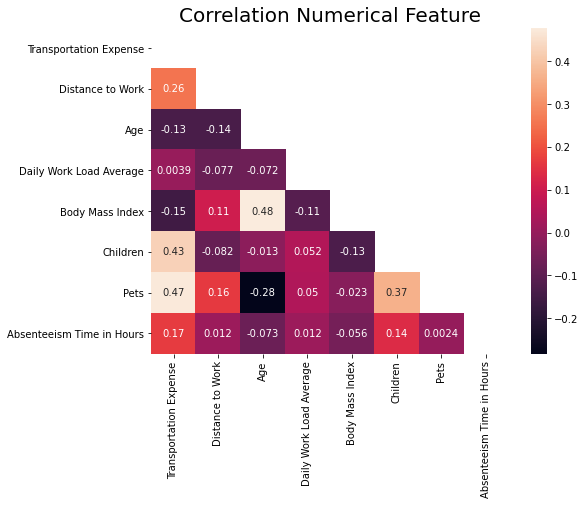

In [67]:
plt.figure(figsize=(8,6))
#Masking
mask = np.triu(np.ones_like(df[num_list].corr()))
sns.heatmap(df[num_list].corr("spearman"),annot=True,mask=mask)
plt.title("Correlation Numerical Feature",fontsize=20)
plt.show()

Transportation expense and childern are have biggest value then others feature but still categorized as weak correlation

## Data Cardinalities

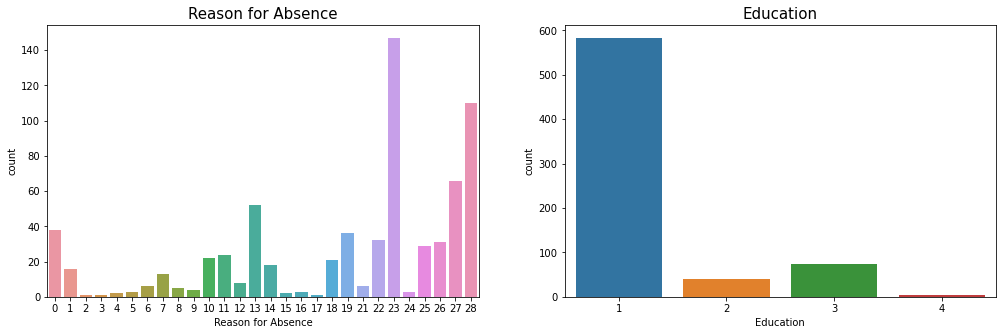

In [68]:
#Object Features
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.countplot(df["Reason for Absence"])
plt.title("Reason for Absence",fontsize=15)

plt.subplot(1,2,2)
sns.countplot(df["Education"])
plt.title("Education",fontsize=15)

plt.show()

Reason for Absence
* There is no number 20
* The most reason are number 23 (medical consultation)

Education
* The most education background are number 1 (High school)

## Identify Missing Value

In [69]:
df.isnull().sum()

Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

There is no missing value in dataset

# Preprocessing

## Casting Data Type

In [70]:
# Chane data type from object to date format
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
df["Date"].head(10)

0   2015-07-07
1   2015-07-14
2   2015-07-15
3   2015-07-16
4   2015-07-23
5   2015-07-10
6   2015-07-17
7   2015-07-24
8   2015-07-06
9   2015-07-13
Name: Date, dtype: datetime64[ns]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason for Absence         700 non-null    int64         
 1   Date                       700 non-null    datetime64[ns]
 2   Transportation Expense     700 non-null    int64         
 3   Distance to Work           700 non-null    int64         
 4   Age                        700 non-null    int64         
 5   Daily Work Load Average    700 non-null    float64       
 6   Body Mass Index            700 non-null    int64         
 7   Education                  700 non-null    int64         
 8   Children                   700 non-null    int64         
 9   Pets                       700 non-null    int64         
 10  Absenteeism Time in Hours  700 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 60.3 KB


## Encode

In [72]:
reason_columns = pd.get_dummies(df["Reason for Absence"],drop_first = True)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Drop first to prevent multicolinearity

## Categorization

To make data more easy to analyze, we will categorize the reason.
* 1-14: All about diseases
* 15-17: All about pregnancy & childbirth
* 18-21: All about poison illness
* 22-28: All about light reasons

In [73]:
reason_type_1 = reason_columns.loc[:,0:14].max(axis=1)
reason_type_2= reason_columns.loc[:,15:17].max(axis=1)
reason_type_3= reason_columns.loc[:,18:21].max(axis=1)
reason_type_4= reason_columns.loc[:,22:].max(axis=1)

In [74]:
#Concate to DataFrame
df = pd.concat([df, reason_type_1,reason_type_2,reason_type_3,reason_type_4],axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [75]:
df.drop(columns="Reason for Absence",inplace=True)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [76]:
#Change columns name
column_names=['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', "Reason 1", "Reason 2", "Reason 3", "Reason 4"]
df.columns = column_names
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason 1,Reason 2,Reason 3,Reason 4
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1


## Extract Date Feature

In [77]:
year = df["Date"].dt.year
month = df["Date"].dt.month
day = df["Date"].dt.day
df = pd.concat([df, year,month,day],axis=1)

In [78]:
#Change columns name
column_names=['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', "Reason 1", "Reason 2", "Reason 3", "Reason 4","Year","Month","Day"]
df.columns = column_names
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason 1,Reason 2,Reason 3,Reason 4,Year,Month,Day
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,2015,7,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,2015,7,14
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,2015,7,15
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,2015,7,16
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,2015,7,23


In [79]:
#Reordering columns
column_names_reordered = [ "Reason 1", "Reason 2", "Reason 3", "Reason 4","Year","Month","Day",'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df=df[column_names_reordered]
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Year,Month,Day,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015,7,7,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015,7,14,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015,7,15,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015,7,16,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015,7,23,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [80]:
df.drop(columns="Date",inplace=True)
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Year,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015,7,7,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015,7,14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015,7,15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015,7,16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015,7,23,289,36,33,239.554,30,1,2,1,2


## Splitting

In [81]:
x = df.drop(columns="Absenteeism Time in Hours")
y = df["Absenteeism Time in Hours"]
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=2020
)

# Data Analytics

Visualization using Tableau
<br>Source: https://public.tableau.com/app/profile/juan1691/viz/AnalysisAbseenteismProject/AnalysisAbseenteism

## Dashboard 1 : Information Abseenteism in Company

<img src='Dashboard 1.png'>

* January & February have the less average abseenteism beside that March, April, and June have mosth average abseenteism time
* ID 3, 11, & 14 have the highest absenteeism time and have the highest average abseenteism on year 2018
* ID 3 have constant abseenteism time. She/he probably has some problem
* ID 11 have peak abseenteism time on March 2018
* ID 14 have the more abseenteism time on end of year

## Dashboard 2 : Personal Information of Employee

<img src='Dashboard 2.png'>

* BMI and Age dont have specific pattern with Abseenteism
* Employee with 2 Children and 1 or 2 pets have more abseenteism time then the others

## Dashboard 3 : Daily Work

<img src='Dashboard 3.png'>

* Transportation expense & workload time dont have any specifict pattern with average abseenteism time
* Short distance (under 28) have more abseenteism time than long distance

## Dashboard 4 : Reasons

<img src='Dashboard 4.1.png'>

* Reason 1 is the highest reason for Abseenteism
* ID 36 and 14 have problem with reason 1
* ID 3 have problem with reason 1 & 4
* ID 11, 14, 16 have problem with reason 3

# Model Selection

We will try several models:
* Linear Regression
* Ridge
* Lasso
* Decision Tree Regression
* KNN Regression

## Model Selection

In [82]:
linreg = LinearRegression()
ridge = Ridge(random_state=2020)
lasso = Lasso()
dt = DecisionTreeRegressor(random_state=2020, criterion='mae')
knn = KNeighborsRegressor()

## Model Benchmarking

In [83]:
model = [linreg,ridge,lasso,dt,knn]

kf = KFold(n_splits=5, shuffle=True, random_state=2020)

score = []
rata = []
std = []

#Use MAE & RobustScaller because there are some outliers
for i in model:
    estimator=Pipeline([
        ('scaling',RobustScaler()),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=kf,scoring='neg_mean_absolute_error')
    score.append(model_cv)
    rata.append(mean(absolute(score)))
    std.append(model_cv.std())

pd.DataFrame({'model':['Linear Regression', 'Ridge', "Lasso", 'Decision Tree', 'KNN'],'mean MAE':rata,'sdev':std}).set_index('model').sort_values(by='mean MAE')

,mean MAE,sdev
model,,
Lasso,5.660029,0.960318
Ridge,5.817951,0.729559
KNN,5.824055,1.034179
Linear Regression,5.830254,0.719247
Decision Tree,5.925498,1.325116


## Benchmarking with Data Test

In [84]:
mae_score = []
std_bm_test = []

for i in model:
    estimator=Pipeline([
        ('scaling',RobustScaler()),
        ('model',i)])
    estimator.fit(x_train,y_train)
    y_pred_bm = estimator.predict(x_test)
    mae_score.append(mean_absolute_error(y_test, y_pred_bm))
    std_bm_test.append(np.std(mae_score))
    
pd.DataFrame({
    "model":['Linear Regression', 'Ridge', "Lasso", 'Decision Tree', 'KNN'],
    "MAE Score":mae_score,
    "Std":std_bm_test,
}).set_index('model').sort_values(by='MAE Score')

,MAE Score,Std
model,,
Linear Regression,5.100284,0.000000
Ridge,5.110390,0.005053
KNN,5.536000,0.516049
Lasso,5.609057,0.237492
Decision Tree,6.517143,0.576557


Based on this benchmarking, we will use Ridge as main model because MAE score and std is low

## Hyperparameter Tuning

In [85]:
estimator = ridge

In [86]:
estimator.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': 2020,
 'solver': 'auto',
 'tol': 0.001}

In [87]:
hyperparam_space={"alpha":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                 'max_iter':[100,250,500]
                 }

In [88]:
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=kf,
    scoring='neg_mean_absolute_error',
    n_jobs=-1                                       
)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -5.812462 using {'alpha': 1.0, 'max_iter': 100}
-5.826264 (0.720801) with: {'alpha': 0.1, 'max_iter': 100}
-5.826264 (0.720801) with: {'alpha': 0.1, 'max_iter': 250}
-5.826264 (0.720801) with: {'alpha': 0.1, 'max_iter': 500}
-5.822564 (0.722285) with: {'alpha': 0.2, 'max_iter': 100}
-5.822564 (0.722285) with: {'alpha': 0.2, 'max_iter': 250}
-5.822564 (0.722285) with: {'alpha': 0.2, 'max_iter': 500}
-5.819996 (0.723915) with: {'alpha': 0.3, 'max_iter': 100}
-5.819996 (0.723915) with: {'alpha': 0.3, 'max_iter': 250}
-5.819996 (0.723915) with: {'alpha': 0.3, 'max_iter': 500}
-5.818452 (0.724806) with: {'alpha': 0.4, 'max_iter': 100}
-5.818452 (0.724806) with: {'alpha': 0.4, 'max_iter': 250}
-5.818452 (0.724806) with: {'alpha': 0.4, 'max_iter': 500}
-5.816985 (0.725648) with: {'alpha': 0.5, 'max_iter': 100}
-5.816985 (0.725648) with: {'alpha': 0.5, 'max_iter': 250}
-5.816985 (0.725648) with: {'alpha': 0.5, 'max_iter': 500}
-5.815479 (0.726516) with: {'alpha': 0.6, 'max_iter': 100}
-5

## Fit in Data Test

In [89]:
ridge_tuning = Ridge(alpha= 1.0, max_iter= 100,random_state=2020)
ridge_tuning.fit(x_train,y_train)
y_pred_tuning = ridge_tuning.predict(x_test)
mae_tuning = mean_absolute_error(y_test, y_pred_tuning)
print('MAE Score After Tuning:', mae_tuning)

MAE Score After Tuning: 5.114597188538885


## Comparison Model Before Tuning and After Tuning

In [90]:
print(f'''
Model Before Tuning : {mae_score[1]}
Model After Tuning : {mae_tuning}
''')


Model Before Tuning : 5.110389560077943
Model After Tuning : 5.114597188538885



We will use Model Before Tuning

# Interpretable & Explainable Model

## Feature Importances

In [91]:
pd.DataFrame({
    "feature_names":list(x),
    "coef": ridge.coef_  
})

,feature_names,coef
0,Reason 1,11.753520
1,Reason 2,2.600203
2,Reason 3,13.129205
3,Reason 4,2.791638
4,Year,0.080392
5,Month,0.653885
6,Day,-0.645912
7,Transportation Expense,-0.189358
8,Distance to Work,-2.198614
9,Age,0.408294


From this section, we know:

* Reason 3 (poison illnes) following with reason 1 (deseases) give more impact than others reasons.
* Beside the reasons, distacnce to work give negation impact, which mean low distance have more probability to absence
* children contribute employee to absence

## Summary SHAP

In [92]:
ex = shap.KernelExplainer(ridge.predict, x_train)
# shap_values = ex.shap_values(x_test)
# shap.summary_plot(shap_values, x_test)

Using 525 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<img src='SHAP.png'>

From SHAP summary, we will know the feature with most impact to abseenteism time (ordered) and the explaination:
* Distance to Work : Low distance work increase abseenteism time
* Daily Work Load Average : Low daily work load average increase abseenteism time
* Transportation Expense : Low transportation expense increase abseenteism time
* Day : Early day on month increase abseenteism time
* Body Mass Index : Low body mass index increase abseenteism time
* Reason 1 & 3 : Reason 1 & 3 have the most effect to abseenteism time than other reasons
* Month : a few month before year end increase abseenteism time
* Age : Higher age increase abseenteism time
* Children : More children increase abseenteism time
* Education : Higher education decrease abseenteism time

## Single Prediction

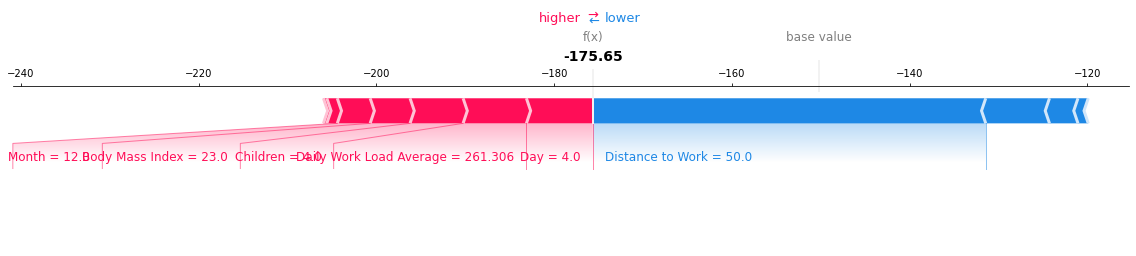

In [118]:
shap.initjs()
shap_values_1 = ex.shap_values(x_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values_1, x_test.iloc[0,:],matplotlib=True, show=False)
plt.savefig('force_plot.png')

# Preprocessing New Dataset

## Load Dataset

In [94]:
df_pred = pd.read_csv("Absenteeism_new_data.csv")
df_pred.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,22,27,01/06/2018,179,26,30,237.656,19,3,0,0
1,10,7,04/06/2018,361,52,28,237.656,27,1,1,4
2,14,23,06/06/2018,155,12,34,237.656,25,1,2,0
3,17,25,08/06/2018,179,22,40,237.656,22,2,2,0
4,14,10,08/06/2018,155,12,34,237.656,25,1,2,0


In [95]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       40 non-null     int64  
 1   Reason for Absence       40 non-null     int64  
 2   Date                     40 non-null     object 
 3   Transportation Expense   40 non-null     int64  
 4   Distance to Work         40 non-null     int64  
 5   Age                      40 non-null     int64  
 6   Daily Work Load Average  40 non-null     float64
 7   Body Mass Index          40 non-null     int64  
 8   Education                40 non-null     int64  
 9   Children                 40 non-null     int64  
 10  Pets                     40 non-null     int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 3.6+ KB


## Casting Data Type

In [96]:
df_pred["Date"] = pd.to_datetime(df_pred["Date"],format="%d/%m/%Y")
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       40 non-null     int64         
 1   Reason for Absence       40 non-null     int64         
 2   Date                     40 non-null     datetime64[ns]
 3   Transportation Expense   40 non-null     int64         
 4   Distance to Work         40 non-null     int64         
 5   Age                      40 non-null     int64         
 6   Daily Work Load Average  40 non-null     float64       
 7   Body Mass Index          40 non-null     int64         
 8   Education                40 non-null     int64         
 9   Children                 40 non-null     int64         
 10  Pets                     40 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 3.6 KB


## Extract Date Feature

In [97]:
year = df_pred["Date"].dt.year
month = df_pred["Date"].dt.month
day = df_pred["Date"].dt.day
df_pred = pd.concat([df_pred, year,month,day],axis=1)
df_pred.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Date,Date,Date
0,22,27,2018-06-01,179,26,30,237.656,19,3,0,0,2018,6,1
1,10,7,2018-06-04,361,52,28,237.656,27,1,1,4,2018,6,4
2,14,23,2018-06-06,155,12,34,237.656,25,1,2,0,2018,6,6
3,17,25,2018-06-08,179,22,40,237.656,22,2,2,0,2018,6,8
4,14,10,2018-06-08,155,12,34,237.656,25,1,2,0,2018,6,8


## Categorization

In [98]:
df_pred["Reason for Absence"].value_counts()

22    6
0     5
19    4
27    3
13    3
10    3
28    2
26    2
25    2
23    2
11    2
7     2
6     2
14    1
8     1
Name: Reason for Absence, dtype: int64

In [99]:
reason_columns = pd.get_dummies(df_pred["Reason for Absence"],drop_first = True)
reason_columns.head()

,6,7,8,10,11,13,14,19,22,23,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
reason_type_1 = reason_columns.loc[:,0:14].max(axis=1)
reason_type_2= reason_columns.loc[:,15:17].max(axis=1)
reason_type_3= reason_columns.loc[:,18:21].max(axis=1)
reason_type_4= reason_columns.loc[:,22:].max(axis=1)

In [101]:
#Concate to DataFrame
df_pred = pd.concat([df_pred, reason_type_1,reason_type_2,reason_type_3,reason_type_4],axis=1)
df_pred.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Date,Date,Date,0,1,2,3
0,22,27,2018-06-01,179,26,30,237.656,19,3,0,0,2018,6,1,0,NaN,0,1
1,10,7,2018-06-04,361,52,28,237.656,27,1,1,4,2018,6,4,1,NaN,0,0
2,14,23,2018-06-06,155,12,34,237.656,25,1,2,0,2018,6,6,0,NaN,0,1
3,17,25,2018-06-08,179,22,40,237.656,22,2,2,0,2018,6,8,0,NaN,0,1
4,14,10,2018-06-08,155,12,34,237.656,25,1,2,0,2018,6,8,1,NaN,0,0


## Rename, Ordering, & Delete Feature

In [102]:
list(df_pred.columns)

['ID',
 'Reason for Absence',
 'Date',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets',
 'Date',
 'Date',
 'Date',
 0,
 1,
 2,
 3]

In [103]:
#Change columns name
column_names=['ID',
 'Reason for Absence',
 'Date',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets',
 'Year',
 'Month',
 'Day',
 "Reason 1",
 "Reason 2",
 "Reason 3",
 "Reason 4"]
df_pred.columns = column_names
df_pred.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Year,Month,Day,Reason 1,Reason 2,Reason 3,Reason 4
0,22,27,2018-06-01,179,26,30,237.656,19,3,0,0,2018,6,1,0,NaN,0,1
1,10,7,2018-06-04,361,52,28,237.656,27,1,1,4,2018,6,4,1,NaN,0,0
2,14,23,2018-06-06,155,12,34,237.656,25,1,2,0,2018,6,6,0,NaN,0,1
3,17,25,2018-06-08,179,22,40,237.656,22,2,2,0,2018,6,8,0,NaN,0,1
4,14,10,2018-06-08,155,12,34,237.656,25,1,2,0,2018,6,8,1,NaN,0,0


In [104]:
#Delete unnecessary Feature
df_pred.drop(columns=["ID","Reason for Absence","Date"],inplace=True)

In [105]:
#Reordering columns
column_names_reordered = [ 'Reason 1',
 'Reason 2',
 'Reason 3',
 'Reason 4','Year',
 'Month',
 'Day','Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets']
df_pred=df_pred[column_names_reordered]
df_pred.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Year,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,NaN,0,1,2018,6,1,179,26,30,237.656,19,3,0,0
1,1,NaN,0,0,2018,6,4,361,52,28,237.656,27,1,1,4
2,0,NaN,0,1,2018,6,6,155,12,34,237.656,25,1,2,0
3,0,NaN,0,1,2018,6,8,179,22,40,237.656,22,2,2,0
4,1,NaN,0,0,2018,6,8,155,12,34,237.656,25,1,2,0


## Identify Missing Value

In [106]:
df_pred.isnull().sum()

Reason 1                    0
Reason 2                   40
Reason 3                    0
Reason 4                    0
Year                        0
Month                       0
Day                         0
Transportation Expense      0
Distance to Work            0
Age                         0
Daily Work Load Average     0
Body Mass Index             0
Education                   0
Children                    0
Pets                        0
dtype: int64

In [107]:
df_pred["Reason 2"] = df_pred['Reason 2'].replace (np.nan, 0)
df_pred.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Year,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0.0,0,1,2018,6,1,179,26,30,237.656,19,3,0,0
1,1,0.0,0,0,2018,6,4,361,52,28,237.656,27,1,1,4
2,0,0.0,0,1,2018,6,6,155,12,34,237.656,25,1,2,0
3,0,0.0,0,1,2018,6,8,179,22,40,237.656,22,2,2,0
4,1,0.0,0,0,2018,6,8,155,12,34,237.656,25,1,2,0


# Prediction Result

## Predict New Dataset

In [108]:
estimator=Pipeline([
    ('scaling',RobustScaler()),
    ('model',ridge)])
estimator.fit(x_train,y_train)
y_pred_bm = estimator.predict(df_pred)

In [109]:
predict = pd.DataFrame(y_pred_bm)
df_pred_1 = pd.read_csv("Absenteeism_new_data.csv")
df_pred = pd.concat([df_pred,df_pred_1["ID"], predict],axis=1)
df_pred.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Year,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,ID,0
0,0,0.0,0,1,2018,6,1,179,26,30,237.656,19,3,0,0,22,2.975334
1,1,0.0,0,0,2018,6,4,361,52,28,237.656,27,1,1,4,10,10.907889
2,0,0.0,0,1,2018,6,6,155,12,34,237.656,25,1,2,0,14,7.628415
3,0,0.0,0,1,2018,6,8,179,22,40,237.656,22,2,2,0,17,6.184871
4,1,0.0,0,0,2018,6,8,155,12,34,237.656,25,1,2,0,14,16.490926


In [110]:
#Change Column name
column_name = ['Reason 1',
 'Reason 2',
 'Reason 3',
 'Reason 4',
 'Year',
 'Month',
 'Day',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets',
 'ID',
 "Absenteeism Time in Hours"]
df_pred.columns = column_name

#Change Order column
column_names_reorder = ["ID",'Reason 1',
 'Reason 2',
 'Reason 3',
 'Reason 4',
 'Year',
 'Month',
 'Day',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Education',
 'Children',
 'Pets',
 "Absenteeism Time in Hours"]
df_pred=df_pred[column_names_reorder]

df_pred.head()

,ID,Reason 1,Reason 2,Reason 3,Reason 4,Year,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,22,0,0.0,0,1,2018,6,1,179,26,30,237.656,19,3,0,0,2.975334
1,10,1,0.0,0,0,2018,6,4,361,52,28,237.656,27,1,1,4,10.907889
2,14,0,0.0,0,1,2018,6,6,155,12,34,237.656,25,1,2,0,7.628415
3,17,0,0.0,0,1,2018,6,8,179,22,40,237.656,22,2,2,0,6.184871
4,14,1,0.0,0,0,2018,6,8,155,12,34,237.656,25,1,2,0,16.490926


In [111]:
df_pred["Absenteeism Time in Hours"] = round(df_pred["Absenteeism Time in Hours"])
df_pred["Absenteeism Time in Hours"] = np.where(df_pred["Absenteeism Time in Hours"]<=0,0,df_pred["Absenteeism Time in Hours"])

In [112]:
df_pred = df_pred.astype({"Reason 2":'int', "Absenteeism Time in Hours":'int'}) 
df_pred.head()

,ID,Reason 1,Reason 2,Reason 3,Reason 4,Year,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,22,0,0,0,1,2018,6,1,179,26,30,237.656,19,3,0,0,3
1,10,1,0,0,0,2018,6,4,361,52,28,237.656,27,1,1,4,11
2,14,0,0,0,1,2018,6,6,155,12,34,237.656,25,1,2,0,8
3,17,0,0,0,1,2018,6,8,179,22,40,237.656,22,2,2,0,6
4,14,1,0,0,0,2018,6,8,155,12,34,237.656,25,1,2,0,16


## Import to CSV File

We will import the prediction file to csv file for more analyzation with Tableau 

In [113]:
df_pred.to_csv('Absenteeism_data_predict.csv', index=False)

## Prediction Analysis

Visualization using Tableau
<br>Source: https://public.tableau.com/app/profile/juan1691/viz/PredictedAbsenteeismProject/PredictedInformation

### Dashboard 1 : Absenteeism Prediction

<img src='prediction 1.png'>

* Day 20 - 24 have more abseenteism time then other day
* Day 6 - 11 also have high absenteeism time although not as high at point 1
* ID 34, 9, 36 predicted will have high absenteeism

### Dashboard 2 : Work Aspect

<img src='prediction 2.png'>

* Low distance (under 28) have higher absenteeism time than higher distance
* Low daily workload have higher absenteeism time than higher daily workload
* The order of impact from reason is reason 1, reason 3, and reason 4


### Dashboard 3 : Personal Information

<img src='prediction 3.png'>
plt.savefig('prediction_3.png')

* Higher age will increase absenteeism time than lower age
* Employee who have 2 children or more have high absenteeism time
* High School employee have high absenteeism time

# Conclusion

## Summary Model

In [114]:
pd.DataFrame({'Model':["Linear Regression","Ridge","Lasso","Decision Tree Regression","KNN Regression","Linear Regression Tuning"],
             'MAE Data Train':[rata[0],rata[1],rata[2],rata[3],rata[4],abs(mean)],
              'F1 score Test':[mae_score[0],mae_score[1],mae_score[2],mae_score[3],mae_score[4],mae_tuning],
             }).set_index('Model')

,MAE Data Train,F1 score Test
Model,,
Linear Regression,5.830254,5.100284
Ridge,5.817951,5.110390
Lasso,5.660029,5.609057
Decision Tree Regression,5.925498,6.517143
KNN Regression,5.824055,5.536000
Linear Regression Tuning,5.812462,5.114597


<p style='text-align: justify;'> Dataset contains information about Absenteeism time of Employee. We use MAE because it robust and there ara several outliers in dataset. I tried 5 models and got the result start from lowest MAE which are Linear Regression, Ridge, KNN Regression, Lasso, and Decision Tree Regression. This dataset more suitable with Linear Regression model and give best performance than the others.
    
<p style='text-align: justify;'> To optimize the model, I did hyperparameter tunning using grid search and found model before tuning gave better performance. To make our model is explainable and interpretable, i used SHAP method. With Feature Importance and SHAP. I also do analytics for raw data set and predicted data set to answer the business problem to help Company reach their goals as mentioned in the problem statement. </p>

Factor that make employee will absent or not are:

* Distance to Work : Low distance work increase abseenteism time
* Daily Work Load Average : Low daily work load average increase abseenteism time
* Transportation Expense : Low transportation expense increase abseenteism time
* Day : Early day on month increase abseenteism time
* Body Mass Index : Low body mass index increase abseenteism time
* Reason 1 & 3 : Reason 1 & 3 have the most effect to abseenteism time than other reasons
* Month : a few month before year end increase abseenteism time
* Age : Higher age increase abseenteism time
* Children : More children increase abseenteism time
* Education : Higher education decrease abseenteism time

## Business Insight

From The data set that i analyze and predict, i can find some insight, they are:
* January & February have the less average abseenteism beside that March, April, and June have most average abseenteism time. Maybe in this month spirit of employee is down and they use the reason to absent
* BMI and Age dont have specific pattern with Abseenteism
* Employee with 2 Children and 1 or 2 pets have more abseenteism time then the others
* Reason 1 (deseases) & 4 (poison illness) are the most reason when employee absent. It mean company less care about the healthy of employee
* 6 - 11 and day 20 - 24 have more abseenteism time then other day. May be there are some traffic at that day every month
* Low distance (under 28) have higher absenteeism time than higher distance
* Low daily workload have higher absenteeism time than higher daily workload. It may be they think thay have more free time so they can do absent
* Company must check employee with ID 3,11, 14 because they have track record to have high absenteeism time
* ID 34, 9, 36 predicted will have high absenteeism

## Recommendation

* The company need to mantain employee spirit. They can make some event to keep employee spirit like gathering or eat together for every division
* For every director or supervisor can reduce the workload for every senior employee so they can mantain their health and prevent absenteeism time
* Every supervisor need to remind their employee to do their task even they need to look after their children or pet
* Employee need to upgrade their health facilities in office or have some link with health facilities near at office so employee no need to waste much time to go to other hospital
* If can, company can give lunch menu or give some snack at office to prevent employee have poison illness
* Every supervisor or director need to track their employee task or make schedule so the employee will stay on track. It include ID 34, 9, 36 who predicted will have high absenteeism
* HR team need to call id 3,11, 14 to ask what improvement that they need to reduce absenteeism time